In [13]:
import pandas as pd
import numpy as np
import scipy as sc

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,7)

In [16]:
#data = pd.read_csv('data/credit_train.csv', sep=';', encoding='cp1251')
#data_test = pd.read_csv('data/credit_test.csv', sep=';', encoding='cp1251')

In [ ]:
dtrain = pd.read_csv('data/credit_train_re.csv')

In [8]:
data.describe()

/home/ad/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170746.000000,170746.000000,170745.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497283,10.980749,1.323900,40138.288354,2.107308,0.046070,0.176028
std,49290.268869,10.546008,3.536698,0.235813,25044.205336,1.777128,0.211548,0.380845
min,1.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,10.000000,1.100000,NaN,NaN,NaN,0.000000
50%,85373.500000,34.000000,10.000000,1.320000,NaN,NaN,NaN,0.000000
75%,128059.750000,43.000000,12.000000,1.600000,NaN,NaN,NaN,0.000000
max,170746.000000,71.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


# preprocessing

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
client_id               170746 non-null int64
gender                  170746 non-null object
age                     170746 non-null int64
marital_status          170746 non-null object
job_position            170746 non-null object
credit_sum              170746 non-null float64
credit_month            170746 non-null int64
tariff_id               170746 non-null float64
score_shk               170746 non-null float64
education               170746 non-null object
living_region           170746 non-null object
monthly_income          170746 non-null float64
credit_count            170746 non-null float64
overdue_credit_count    170746 non-null float64
open_account_flg        170746 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 19.5+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91940 entries, 0 to 91939
Data columns (total 14 columns):
client_id               91940 non-null int64
gender                  91940 non-null object
age                     91940 non-null int64
marital_status          91940 non-null object
job_position            91940 non-null object
credit_sum              91940 non-null float64
credit_month            91940 non-null int64
tariff_id               91940 non-null float64
score_shk               91940 non-null float64
education               91940 non-null object
living_region           91940 non-null object
monthly_income          91940 non-null int64
credit_count            91940 non-null float64
overdue_credit_count    91940 non-null float64
dtypes: float64(5), int64(4), object(5)
memory usage: 9.8+ MB


In [8]:
data.head(10)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,59998.00,10,1.6,0.770249,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,0.459589,SCH,САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,0.362536,GRD,ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,16908.89,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,25000.0,1.0,0.0,0
5,6,F,37,MAR,SPC,26788.00,10,1.1,0.484203,SCH,СТАВРОПОЛЬСКИЙ,30000.0,0.0,0.0,0
6,7,M,34,MAR,SPC,10317.00,6,1.5,0.276012,SCH,НИЖЕГОРОДСКАЯ,28000.0,3.0,0.0,0
7,8,F,26,UNM,SPC,47878.00,10,1.1,0.512525,GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
8,9,M,23,UNM,SPC,37577.16,12,1.6,0.642267,SCH,ХАНТЫ-МАНСИЙСКИЙЮГРА,50000.0,3.0,0.0,0
9,10,F,32,UNM,SPC,26268.00,10,1.1,0.465026,GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0


In [17]:
ID_test = data_test.client_id.values
y_train = data.open_account_flg.values

In [18]:
a = ['РЕСП', 'ОБЛ', 'ОБЛАСТЬ', 'КРАЙ', 'ОБЛ.', 'РЕСП.', 'Р-Н', 'АО', 'КРАЙ.', '-', 'Г', 'Г.', 'АОБЛ', 'РЕСПУБЛИКА',
    'ОКРУГ', 'АВТОНОМНЫЙ']

data.monthly_income.fillna(data.monthly_income.median(), inplace=True)
data.living_region.fillna('Н', inplace=True)
data.credit_count.fillna(-1, inplace=True)
data.overdue_credit_count.fillna(-1, inplace=True)
data['credit_sum'] = data.credit_sum.apply(lambda x: float(x.replace(',', '.')))
data['score_shk'] = data.score_shk.apply(lambda x: float(x.replace(',', '.')))
data['living_region'] = data.living_region.apply(lambda x: ''.join([y for y in x.split() if y not in a]))


data_test.monthly_income.fillna(data.monthly_income.median(), inplace=True)
data_test.living_region.fillna('Н', inplace=True)
data_test.credit_count.fillna(-1, inplace=True)
data_test.overdue_credit_count.fillna(-1, inplace=True)
data_test['credit_sum'] = data_test.credit_sum.apply(lambda x: float(x.replace(',', '.')))
data_test['score_shk'] = data_test.score_shk.apply(lambda x: float(x.replace(',', '.')))
data_test['living_region'] = data_test.living_region.apply(lambda x: ''.join([y for y in x.split() if y not in a]))

In [7]:
c = data_test.living_region.unique()
d = data.living_region.unique()
for elem in c:
    if elem not in d:
        data_test.loc[data_test.living_region == elem, 'living_region'] = 'Н'

## one-hot-encoding

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
categorical_cols = ['gender', 'marital_status', 'job_position', 'credit_month', 'tariff_id', 'education', 'living_region']
other_cols = ['age', 'credit_sum', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count']
all_cols = ['gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'monthly_income', 'credit_count',
       'overdue_credit_count', 'living_region']

label_enc = LabelEncoder()
enc = OneHotEncoder(categorical_features=[2, 3, 5, 6, 8])

for col in categorical_cols:
    label_enc.fit(data[col])
    data[col] = label_enc.transform(data[col])
    data_test[col] = label_enc.transform(data_test[col])
enc.fit(data[all_cols])
X_train = enc.transform(data[all_cols])
X_test = enc.transform(data_test[all_cols])

## счетчики

In [8]:
from sklearn.cross_validation import KFold

In [9]:
#counters
def make_counters(X, y, folding=True, n_folds=10):
    n_samples = X.shape[0]
    n_features = X.shape[1]
    new_X = np.zeros((n_samples, 3 * n_features), dtype=float)
    if folding:
        kf = KFold(n=n_samples, n_folds=n_folds, shuffle=True)
    else:
        kf = [(np.arange(n_samples), np.arange(n_samples))]
    for train_ind, test_ind in kf:
        # train_ind - на основе чего строим счетчики
        for i in range(0, n_features):
            uniq_values, counts = np.unique(X[train_ind, i], return_counts=True)
            for j in range(0, uniq_values.shape[0]):
                ind = test_ind[np.where(X[test_ind, i] == uniq_values[j])[0]]
                new_X[ind, i] = counts[j] / train_ind.shape[0]  # учитываем размер train
                successes = np.sum(y[train_ind[np.where(X[train_ind, i] == uniq_values[j])[0]]])
                new_X[ind, n_features + i] = successes / train_ind.shape[0]
                new_X[ind, 2 * n_features + i] = (successes + 1) / (counts[j] + 2)
    return new_X

def make_counters_test(X_test, X_train, y_train):
    n_samples = X_test.shape[0]
    n_features = X_test.shape[1]
    new_X = np.zeros((n_samples, 3 * n_features), dtype=float)
    
    for i in range(0, n_features):
        uniq_values, counts = np.unique(X_train[:, i], return_counts=True)
        for j in range(0, uniq_values.shape[0]):
            ind = np.where(X_test[:, i] == uniq_values[j])[0]
            new_X[ind, i] = counts[j] / X_train.shape[0]
            successes = np.sum(y_train[np.where(X_train[:, i] == uniq_values[j])[0]])
            new_X[ind, n_features + i] = successes / X_train.shape[0]
            new_X[ind, 2 * n_features + i] = (successes + 1) / (counts[j] + 2)
    return new_X

In [10]:
#pairs
def make_pairs(data, col_names):
    n_features = len(col_names)
    new_col_names = []
    for i in range(n_features - 1):
        for j in range(i + 1, n_features):
            data[col_names[i] + '__' + col_names[j]] = data[col_names[i]].astype(str) + '#' + data[col_names[j]].astype(str)
            new_col_names.append(col_names[i] + '__' + col_names[j])
    return data, new_col_names

In [11]:
# объединяем редко встречающиеся значения признаков
def compress_vals(data, data_test, col_name, threshold, value):
    a = data[col_name].value_counts()[data[col_name].value_counts() < threshold].index.values
    for val in a:
        data.loc[data[col_name] == val, col_name] = value
        data_test.loc[data_test[col_name] == val, col_name] = value
        
def replace_val(d, col_name, olds, new):
    for old in olds:
        d.loc[d[col_name] == old, col_name] = new

In [19]:
counters_cols = ['gender', 'marital_status', 'job_position', 'credit_month', 'tariff_id', 
                'education', 'living_region', 'age', 'credit_count', 'overdue_credit_count', 'age_group']
other_cols = ['credit_sum', 'score_shk', 'monthly_income']

# Объединим редко встречающиеся значения признаков
data.loc[data.credit_count > 7, 'credit_count'] = 7
data_test.loc[data_test.credit_count > 7, 'credit_count'] = 7
data.loc[data.overdue_credit_count > 2, 'credit_count'] = 2
data_test.loc[data_test.credit_count > 2, 'credit_count'] = 2

compress_vals(data, data_test, 'living_region', 30, 'Н')
compress_vals(data, data_test, 'tariff_id', 30, 2.0)
compress_vals(data, data_test, 'job_position', 30, 'N')

data['age_group'] = 0
data_test['age_group'] = 0
a = [range(18, 22), range(22, 25), range(25, 38), range(38, 50), range(50, 58), range(58, 66), range(66, 100)]
for i in range(len(a)):
    for val in a[i]:
        data.loc[data.age == val, 'age_group'] = i
        data_test.loc[data_test.age == val, 'age_group'] = i

replace_val(data, 'credit_month', [30, 31, 32], 36)
replace_val(data_test, 'credit_month', [30, 31, 32], 36)
replace_val(data, 'credit_month', [21, 22, 23, 25, 26, 27, 28, 29], 24)
replace_val(data_test, 'credit_month', [21, 22, 23, 25, 26, 27, 28, 29], 24)
replace_val(data, 'credit_month', [17], 18)
replace_val(data_test, 'credit_month', [17], 18)

#пары признаков
pairs_to_col = ['gender', 'marital_status', 'credit_count', 'overdue_credit_count', 'age_group', 'job_position',
             'education']
data, pair_cols = make_pairs(data, pairs_to_col)
data_test, pair_cols = make_pairs(data_test, pairs_to_col)

In [ ]:
#счетчики
#X_train = np.hstack((make_counters(X=data[counters_cols].values, y=data.open_account_flg, n_folds=10),
#                     data[other_cols]))
#X_test = np.hstack((make_counters_test(data_test[counters_cols].values, data[counters_cols].values, data.open_account_flg),
#                    data_test[other_cols]))

In [22]:
#data.to_csv('data/credit_train_re.csv', index=False)
#data_test.to_csv('data/credit_test_re.csv', index=False)

In [12]:
del data
del data_test

# Графики

In [27]:
from sklearn.preprocessing import LabelEncoder

In [10]:
pair_cols = ['gender', 'marital_status', 'job_position', 'education', 'credit_count', 'overdue_credit_count']

data, pairs = make_pairs(data, pair_cols)

In [25]:
pair_cols = ['gender', 'age']

data, pairs = make_pairs(data, pair_cols)

In [28]:
label_enc = LabelEncoder()
for col in pairs:
    data[col] = label_enc.fit_transform(data[col])

In [12]:
pairs

['gender+marital_status',
 'gender+job_position',
 'gender+education',
 'gender+credit_count',
 'gender+overdue_credit_count',
 'marital_status+job_position',
 'marital_status+education',
 'marital_status+credit_count',
 'marital_status+overdue_credit_count',
 'job_position+education',
 'job_position+credit_count',
 'job_position+overdue_credit_count',
 'education+credit_count',
 'education+overdue_credit_count',
 'credit_count+overdue_credit_count']

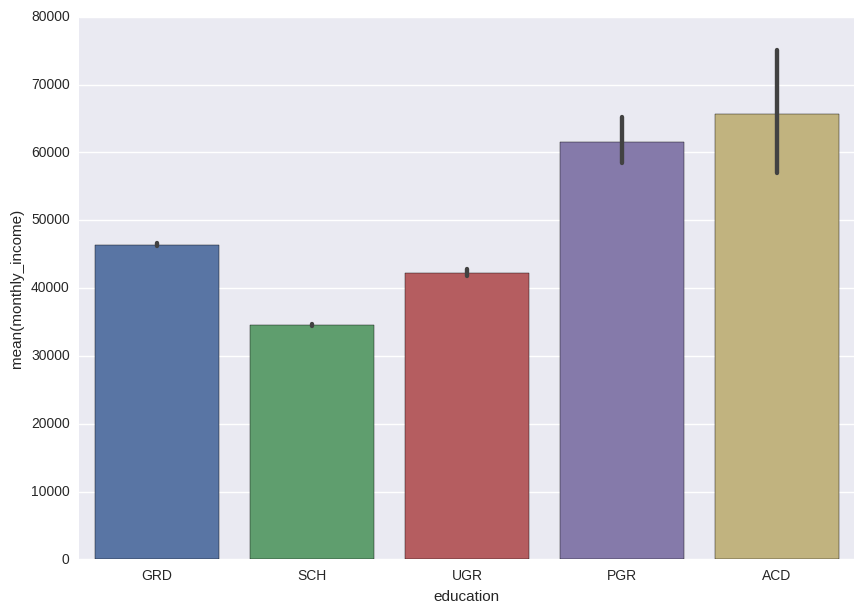

In [33]:
sns.barplot(x=data.education, y=data.monthly_income)

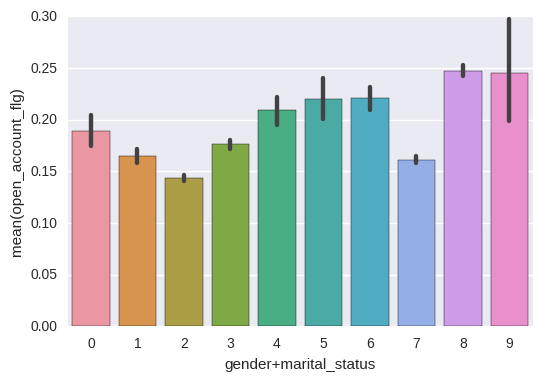

In [18]:
sns.barplot(x=data['gender+marital_status'], y=data.open_account_flg)

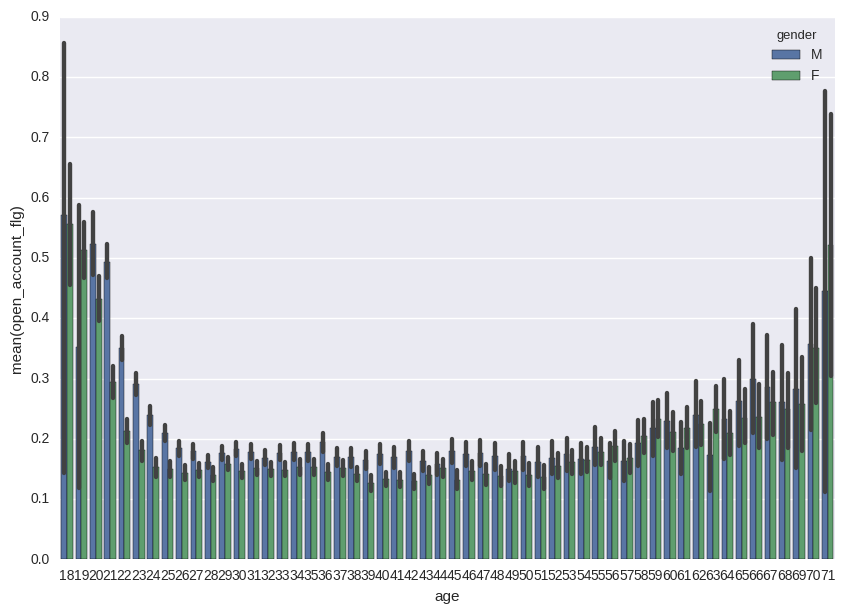

In [29]:
sns.barplot(x=data.age, y=data.open_account_flg, hue=data.gender)

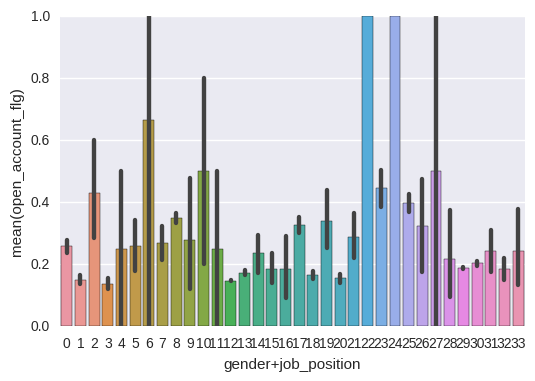

In [19]:
sns.barplot(x=data['gender+job_position'], y=data.open_account_flg)

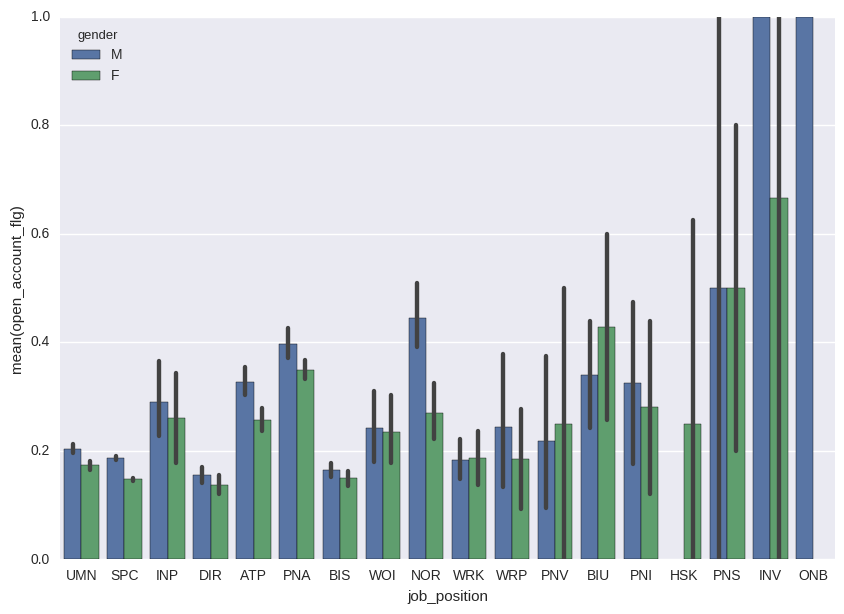

In [42]:
sns.barplot(x=data.job_position, y=data.open_account_flg, hue=data.gender)

Пол

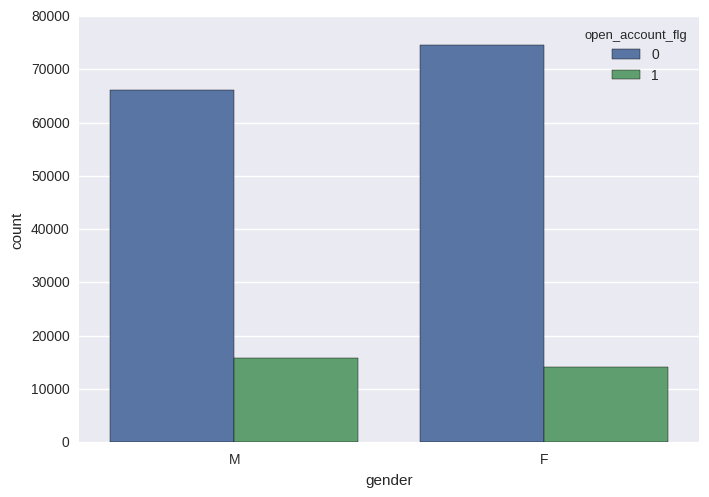

In [32]:
sns.countplot(x=data.gender, hue=data.open_account_flg)

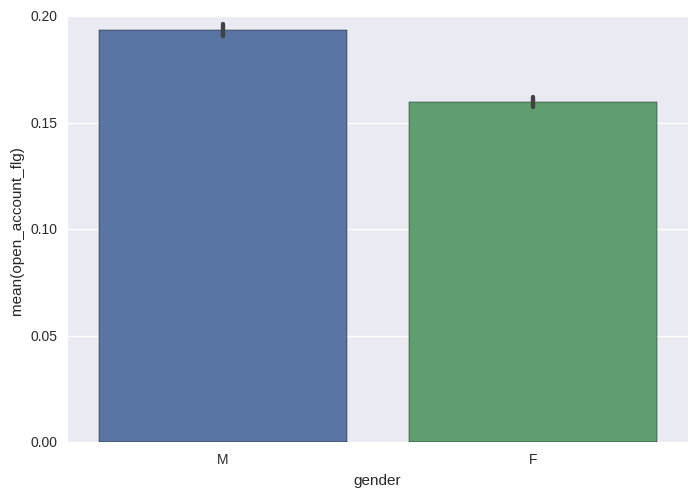

In [41]:
sns.barplot(x=data.gender, y=data.open_account_flg)

Возраст

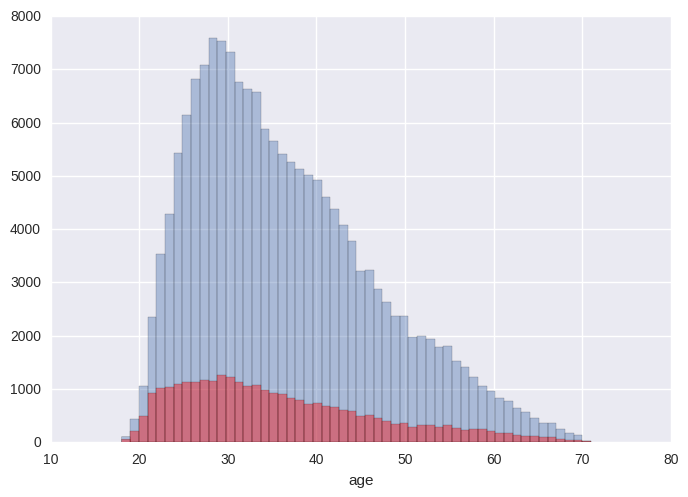

In [25]:
sns.distplot(data.age, kde=False, bins=54)
sns.distplot(data[data.open_account_flg == 1].age, kde=False, bins=54, color='r')

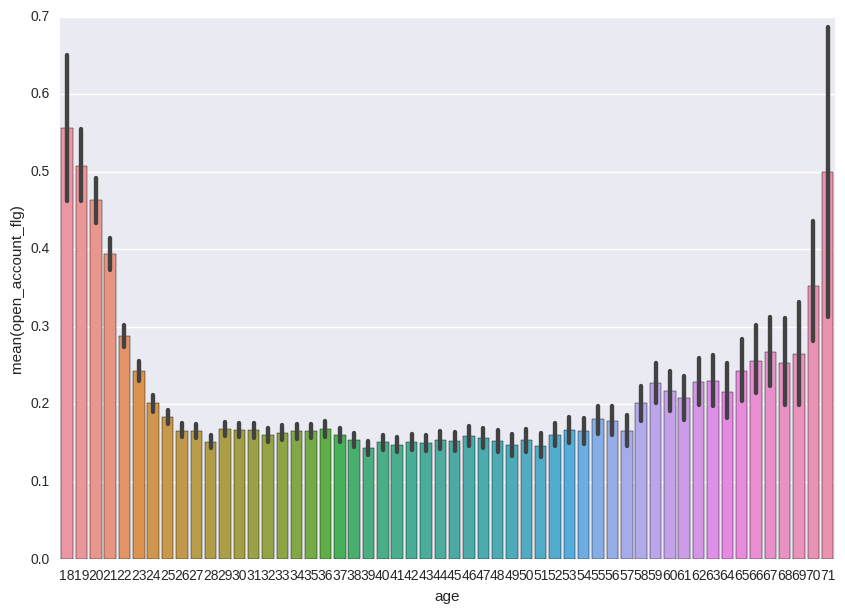

In [30]:
sns.barplot(x=data.age, y=data.open_account_flg)

Семейное положение

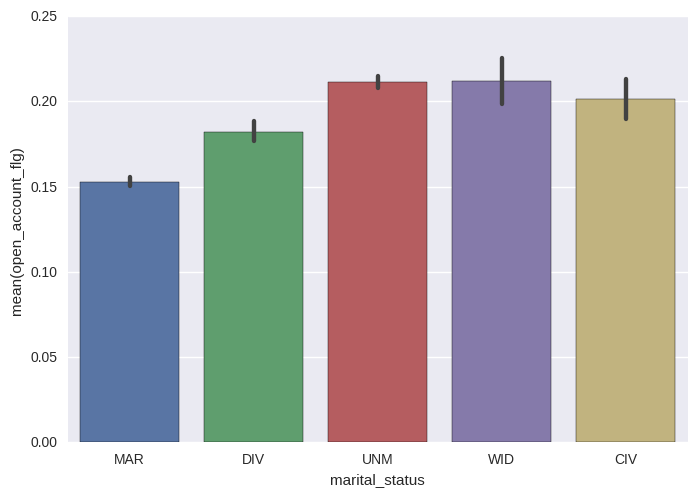

In [39]:
sns.barplot(x=data.marital_status, y=data.open_account_flg)

Образование

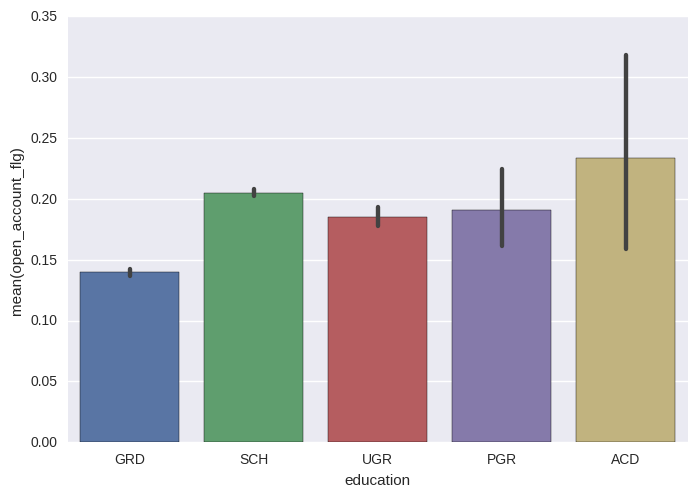

In [37]:
sns.barplot(x=data.education, y=data.open_account_flg)

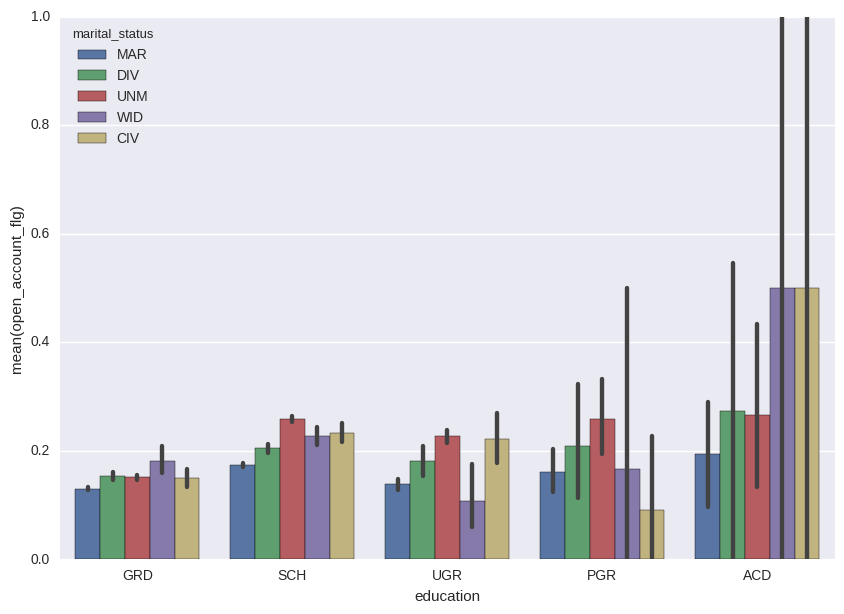

In [43]:
sns.barplot(x=data.education, y=data.open_account_flg, hue=data.marital_status)

Размер кредита

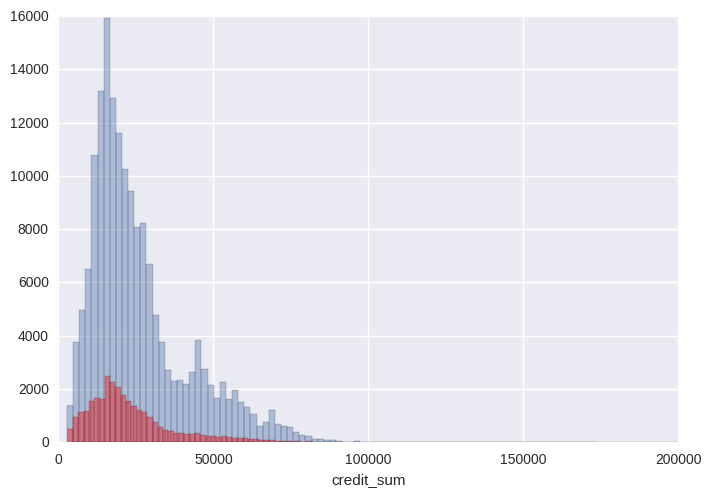

In [57]:
sns.distplot(data.credit_sum, kde=False, bins=100)
sns.distplot(data[data.open_account_flg == 1].credit_sum, kde=False, bins=100, color='r')

Тариф

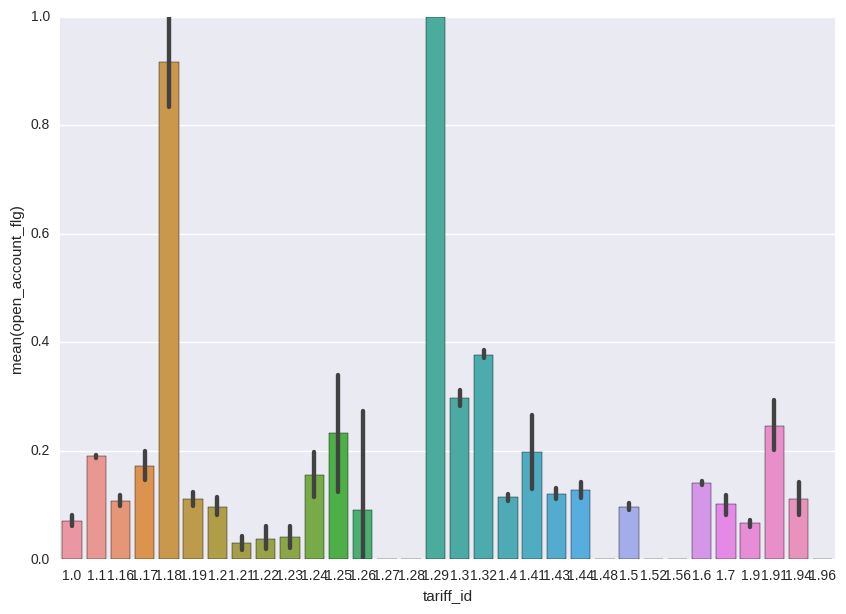

In [16]:
sns.barplot(x=data.tariff_id, y=data.open_account_flg)

In [ ]:
sns.barplot(x=data.tariff_id, y=data.open_account_flg)

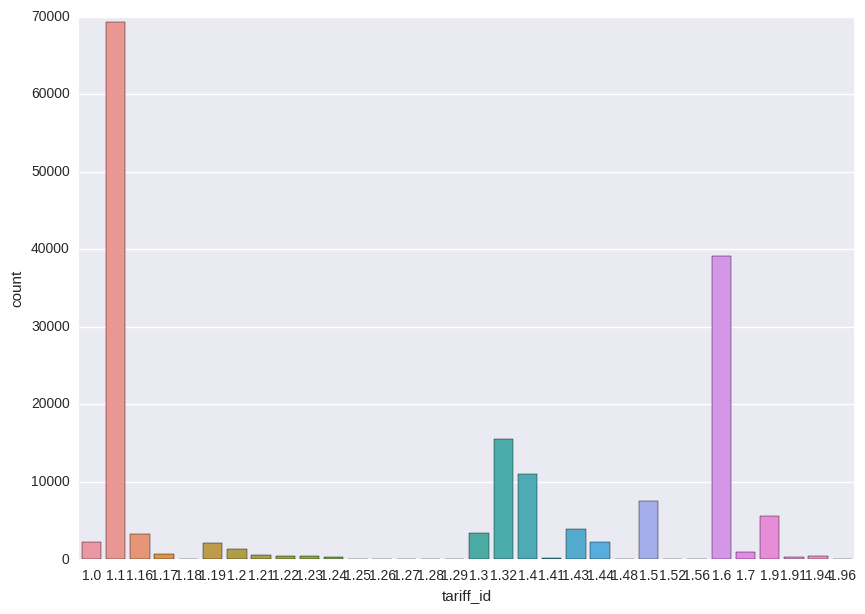

In [17]:
sns.countplot(x=data.tariff_id)

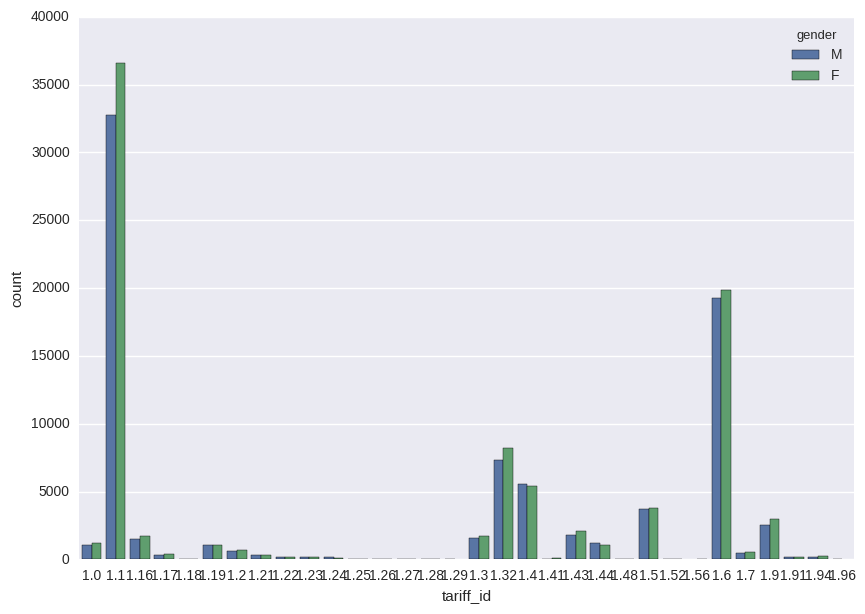

In [39]:
sns.countplot(x=data.tariff_id, hue=data.gender)

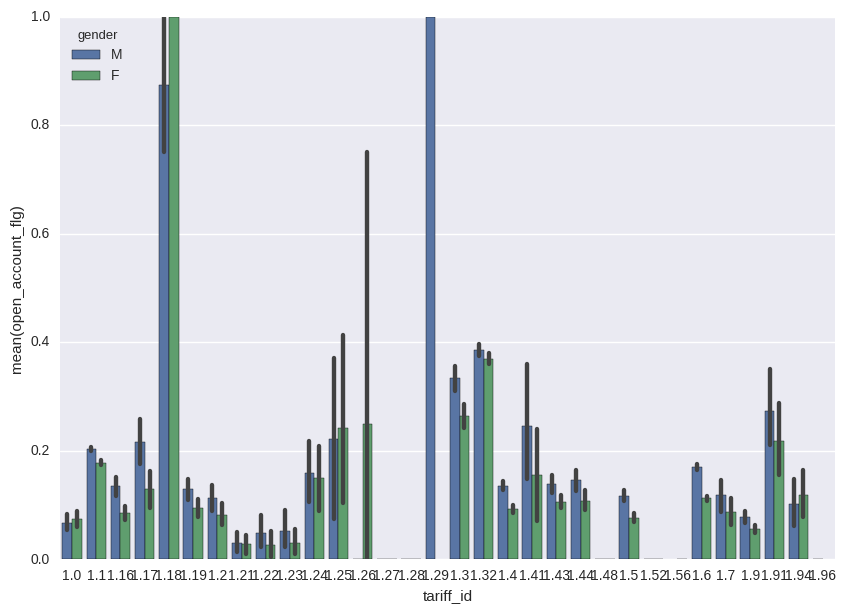

In [41]:
sns.barplot(x=data.tariff_id, y=data.open_account_flg, hue=data.gender)

Количество взятых/просроченных кредитов

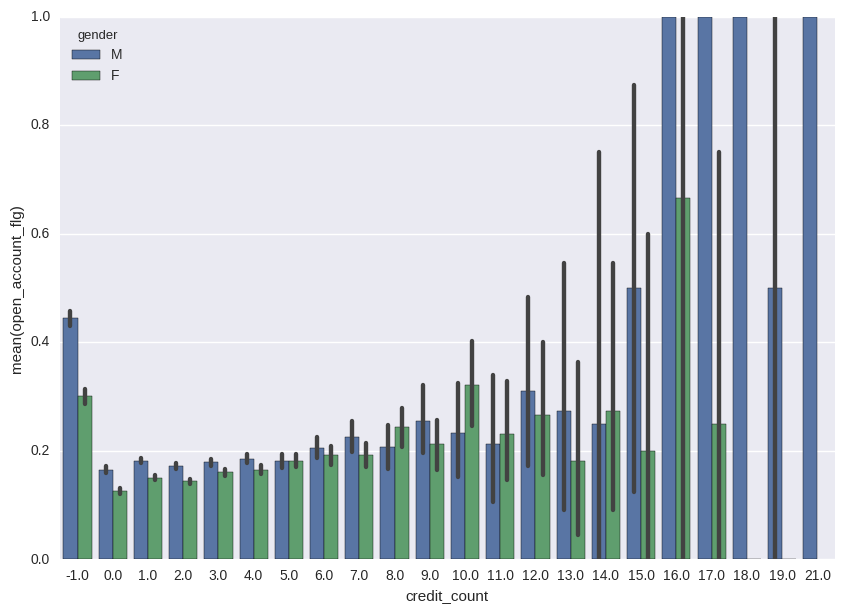

In [34]:
sns.barplot(x=data.credit_count, y=data.open_account_flg, hue=data.gender)

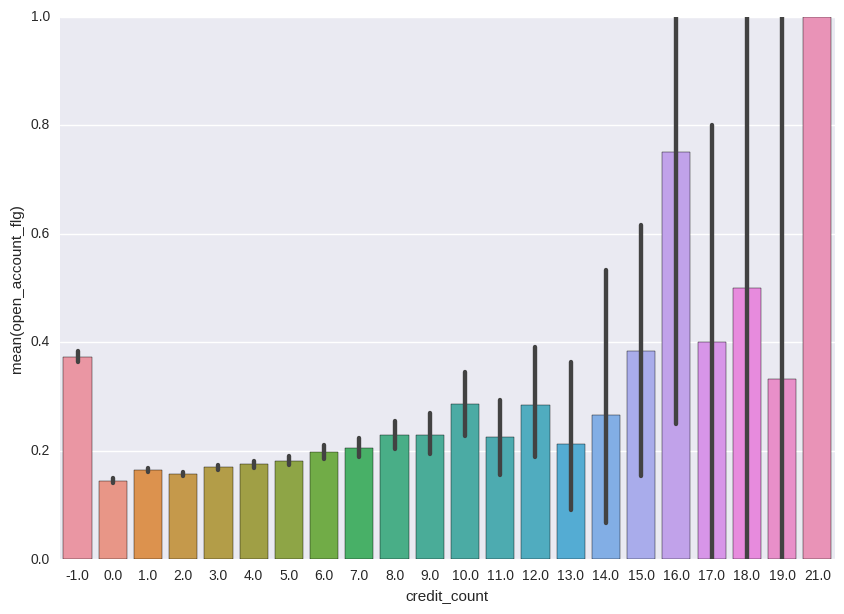

In [35]:
sns.barplot(x=data.credit_count, y=data.open_account_flg)

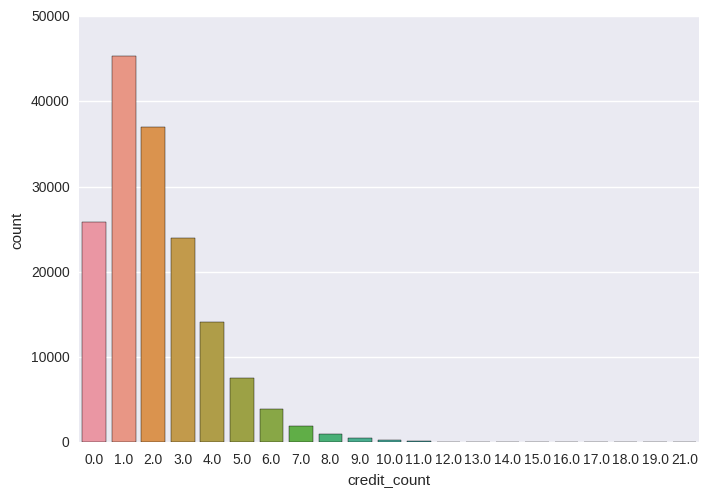

In [80]:
sns.countplot(x=data.credit_count)

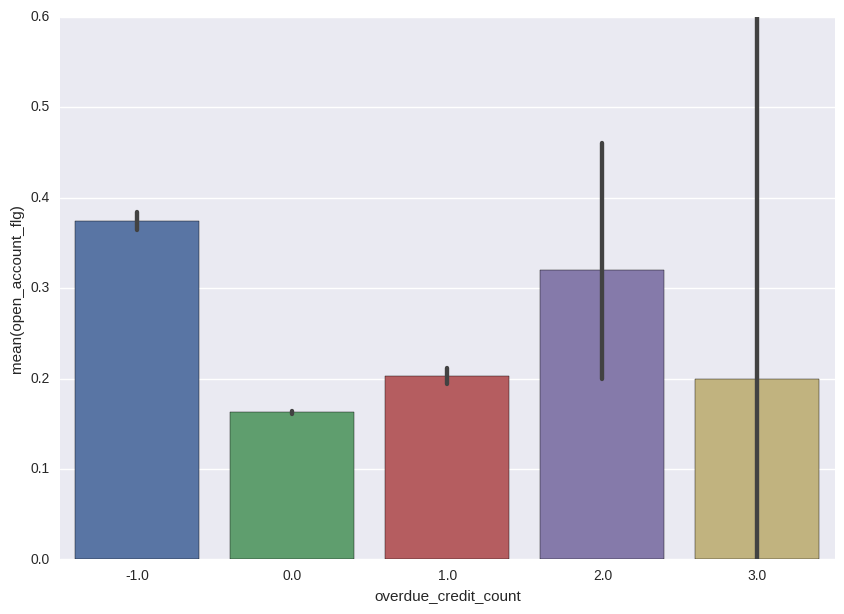

In [36]:
sns.barplot(x=data.overdue_credit_count, y=data.open_account_flg)

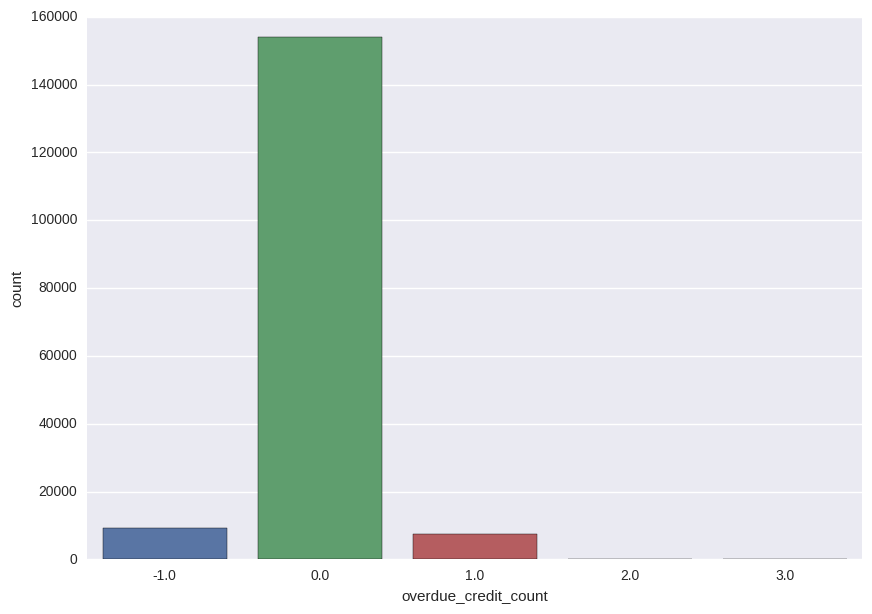

In [37]:
sns.countplot(x=data.overdue_credit_count)

score-shk???

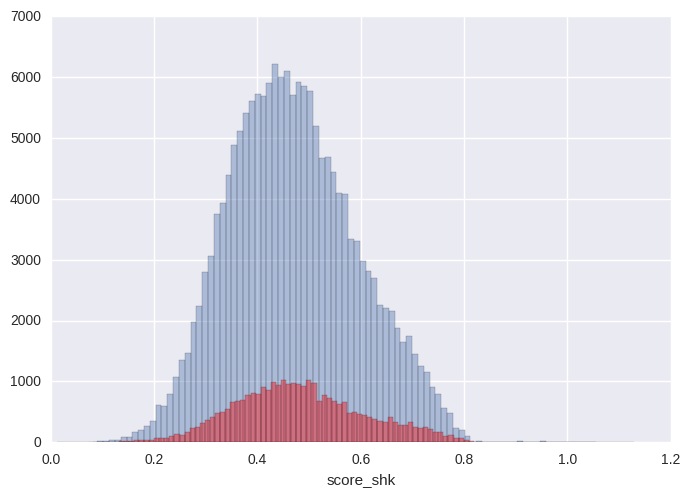

In [83]:
sns.distplot(data.score_shk, kde=False, bins=100)
sns.distplot(data[data.open_account_flg == 1].score_shk, kde=False, bins=100, color='r')

credit_month

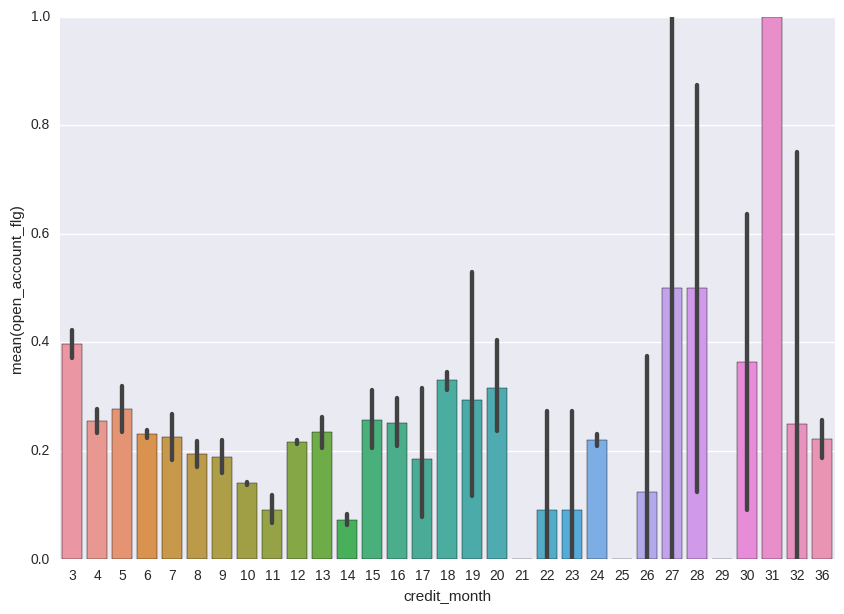

In [31]:
sns.barplot(x=data.credit_month, y=data.open_account_flg)

In [32]:
data.credit_month.value_counts()

10    95724
12    45341
6     10203
24     6080
18     2962
14     2578
4      1400
3      1350
8      1015
13      836
9       627
36      500
11      482
5       400
16      394
7       387
15      230
20      114
17       38
19       17
22       11
30       11
23       11
26        8
28        8
21        7
25        4
32        4
27        2
29        1
31        1
Name: credit_month, dtype: int64

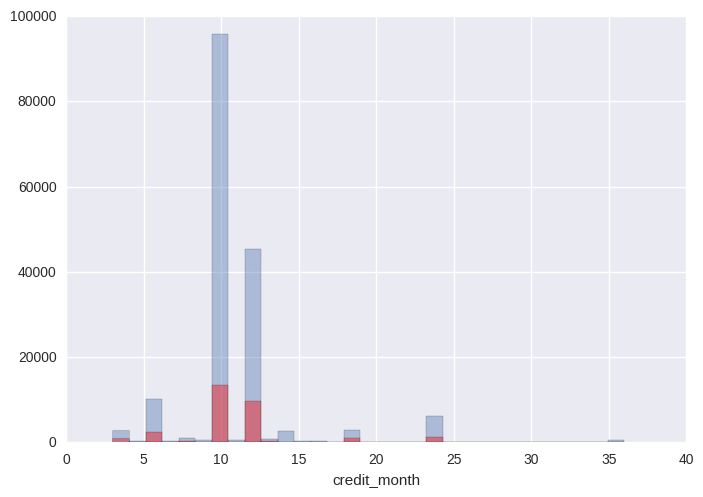

In [19]:
sns.distplot(data.credit_month, kde=False, bins=31)
sns.distplot(data[data.open_account_flg == 1].credit_month, kde=False, bins=31, color='r')

location

In [9]:
enc = LabelEncoder()
locs = enc.fit_transform(data.living_region)

In [12]:
data['lc'] = locs

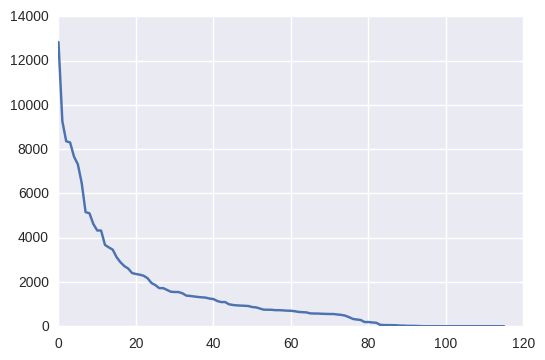

In [17]:
plt.plot(np.arange(data.lc.max()+1), data.lc.value_counts())

In [ ]:
plt.plot(locs.unique`)

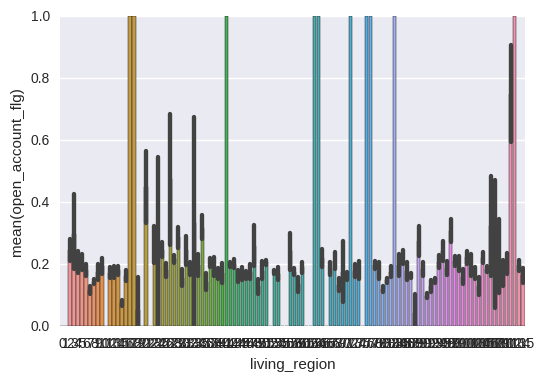

In [19]:
sns.barplot(x=data.living_region, y=data.open_account_flg)

PCA

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler

In [123]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X = PCA(n_components=2).fit_transform(X_train.toarray())

In [125]:
X.shape

(170746, 2)

In [134]:
color = (data.open_account_flg > 0).astype(int)

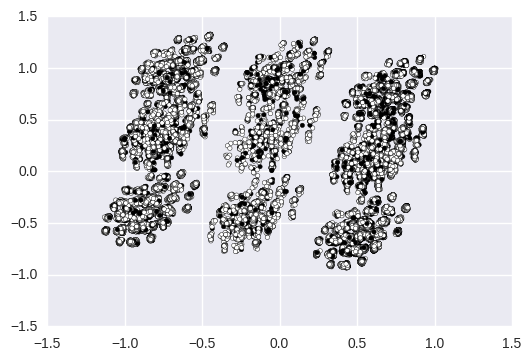

In [136]:
plt.scatter(X[:, 0], X[:, 1], c=color, s=10)

In [117]:
?PCA

# m

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.linear_model import SGDClassifier

In [13]:
import xgboost as xgb

In [15]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [29]:
def modelfit(alg, X, y, useTrainCV=True, cv_folds=10, early_stopping_rounds=50, metric='auc'):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=metric, early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y, eval_metric=metric)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [14]:
X_train.shape, X_test.shape

((170746, 33), (91940, 33))


Model Report
Accuracy : 0.839
AUC Score (Train): 0.795900


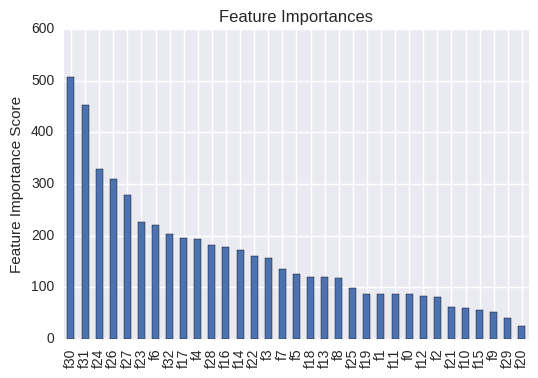

In [21]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, X_train, y_train)

In [22]:
xgb1.get_xgb_params()

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 189,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [25]:
param_test1 = {
 'max_depth': [3, 5, 7, 9],
 'min_child_weight': [1, 3, 5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=189, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=3, iid=False, cv=10)
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.76499, std: 0.00517, params: {'min_child_weight': 1, 'max_depth': 3},
  mean: 0.76483, std: 0.00522, params: {'min_child_weight': 3, 'max_depth': 3},
  mean: 0.76503, std: 0.00532, params: {'min_child_weight': 5, 'max_depth': 3},
  mean: 0.76800, std: 0.00492, params: {'min_child_weight': 1, 'max_depth': 5},
  mean: 0.76823, std: 0.00501, params: {'min_child_weight': 3, 'max_depth': 5},
  mean: 0.76810, std: 0.00512, params: {'min_child_weight': 5, 'max_depth': 5},
  mean: 0.76625, std: 0.00508, params: {'min_child_weight': 1, 'max_depth': 7},
  mean: 0.76631, std: 0.00494, params: {'min_child_weight': 3, 'max_depth': 7},
  mean: 0.76683, std: 0.00502, params: {'min_child_weight': 5, 'max_depth': 7},
  mean: 0.76072, std: 0.00455, params: {'min_child_weight': 1, 'max_depth': 9},
  mean: 0.76215, std: 0.00490, params: {'min_child_weight': 3, 'max_depth': 9},
  mean: 0.76277, std: 0.00520, params: {'min_child_weight': 5, 'max_depth': 9}],
 {'max_depth': 5, 'min_child_weight': 3

In [28]:
param_test2 = {
    'gamma': [0.0, 0.1, 0.2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=189, max_depth=5,
                        min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test2, scoring='roc_auc', n_jobs=3, iid=False, cv=10)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.76823, std: 0.00501, params: {'gamma': 0.0},
  mean: 0.76828, std: 0.00481, params: {'gamma': 0.1},
  mean: 0.76799, std: 0.00502, params: {'gamma': 0.2}],
 {'max_depth': 5, 'min_child_weight': 3},
 0.76822964258963489)


Model Report
Accuracy : 0.8398
AUC Score (Train): 0.800331


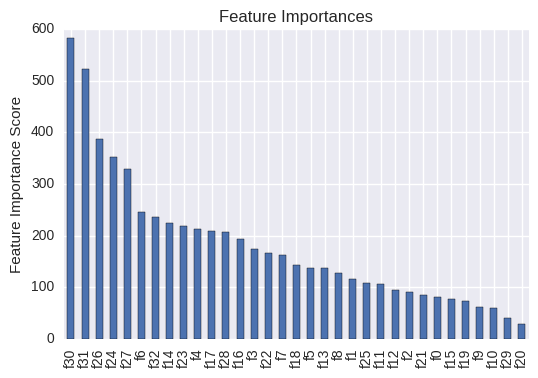

In [30]:
xgb2 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5,
                    min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                    objective= 'binary:logistic', scale_pos_weight=1, seed=27)
modelfit(xgb2, X_train, y_train)

In [33]:
xgb2.get_xgb_params()

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 229,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [32]:
xgb2.fit(X_train, y_train)
answer = xgb2.predict(X_test)
answer_prob = xgb2.predict_proba(X_test)

In [37]:
answer_train = xgb2.predict(X_train)
answer_train_prob = xgb2.predict_proba(X_train)

In [41]:
np.mean(answer_train_prob[:, 1])

0.17595419

In [40]:
answer_train_prob

array([[ 0.9080739 ,  0.09192611],
       [ 0.80041701,  0.19958299],
       [ 0.70152152,  0.29847848],
       ..., 
       [ 0.65230358,  0.34769645],
       [ 0.46511376,  0.53488624],
       [ 0.93335819,  0.06664179]], dtype=float32)

In [43]:
np.mean(answer_prob[:, 1])

0.17059784

In [50]:
fpr, tpr, thr = metrics.roc_curve(y_train, answer_train_prob[:, 1])

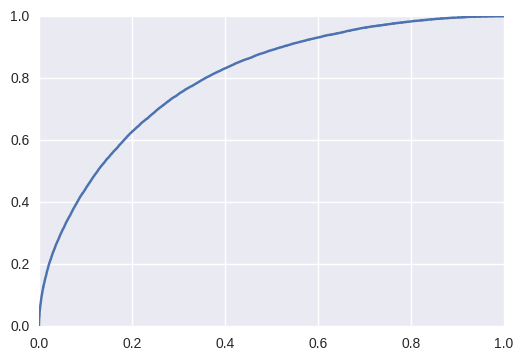

In [51]:
plt.plot(fpr, tpr)

In [52]:
answer_prob

array([[ 0.9464528 ,  0.05354723],
       [ 0.86171228,  0.13828772],
       [ 0.7259891 ,  0.27401087],
       ..., 
       [ 0.97765833,  0.02234168],
       [ 0.71615249,  0.28384751],
       [ 0.94318241,  0.05681758]], dtype=float32)

In [46]:
answer = (answer_train_prob[:, 1] > 0.4).astype(int)

In [47]:
np.mean(answer == y_train)

0.83955114614690829

In [23]:
?GridSearchCV

In [19]:
?xgb.cv

In [60]:
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.1
}
n_est = 200

In [61]:
X_train = xgb.DMatrix(X_train, data.open_account_flg.values)
X_test = xgb.DMatrix(X_test)

In [62]:
clf = xgb.train(param, X_train, num_boost_round=n_est)

In [92]:
answer = clf.predict(X_test)

In [64]:
np.mean(answer)

0.17654265

In [93]:
answer = (answer > 0.31).astype(int)

In [94]:
np.mean(answer)

0.17792038285838591

In [54]:
an = pd.DataFrame({'_ID_': ID_test, '_VAL_': answer_prob[:, 1]})
an.to_csv('output.csv', index=False)

# результаты

* one-hot-encoding

* param = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.1
 }

* n_est = 200
* answer = (answer > 0.31)  0.17792038285838591
* Результат: 0.6413

* counters

* counters_cols = ['gender', 'marital_status', 'job_position', 'credit_month', 'tariff_id', 'education', 'living_region', 'age', 'credit_count', 'overdue_credit_count']

* other_cols = ['credit_sum', 'score_shk', 'monthly_income']

* {'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 229,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}
 
* validation: 0.76822964258963489
 
* public test: 0.7651